In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
# To build linear regression_model
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/expected_ctc.csv'

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,25550,18,13,Engineering,Project Manager,Automobile,I,Assistant Manager,PG,...,Kanpur,Mumbai,3410899,N,B,3,6,0,0,4434168
24996,24997,53442,12,8,HR,Others,Analytics,B,Sr.Manager,Under Grad,...,Bangalore,Nagpur,1350793,Y,B,6,7,0,0,1756030
24997,24998,15777,22,8,Banking,Head,Insurance,D,Software Developer,Under Grad,...,Pune,Delhi,1681796,N,C,4,5,2,0,1934065
24998,24999,57616,25,8,Marketing,CEO,BFSI,D,Marketing Manager,PG,...,Delhi,Pune,3311090,Y,B,3,1,1,0,4370638


In [ ]:
df.head().T

,0,1,2,3,4
IDX,1,2,3,4,5
Applicant_ID,22753,51087,38413,11501,58941
Total_Experience,0,23,21,15,10
Total_Experience_in_field_applied,0,14,12,8,5
Department,NaN,HR,Top Management,Banking,Sales
Role,NaN,Consultant,Consultant,Financial Analyst,Project Manager
Industry,NaN,Analytics,Training,Aviation,Insurance
Organization,NaN,H,J,F,E
Designation,NaN,HR,NaN,HR,Medical Officer
Education,PG,Doctorate,Doctorate,Doctorate,Grad


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [ ]:
df.drop(['Organization'],axis=1,inplace=True)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
IDX,1,2,3,4,5,6,7,8,9,10,...,24991,24992,24993,24994,24995,24996,24997,24998,24999,25000
Applicant_ID,22753,51087,38413,11501,58941,30564,27267,36521,11616,43886,...,34589,13280,35325,31883,32035,25550,53442,15777,57616,20788
Total_Experience,0,23,21,15,10,16,1,19,8,15,...,22,1,25,15,7,18,12,22,25,8
Total_Experience_in_field_applied,0,14,12,8,5,3,1,11,7,15,...,1,1,12,13,3,13,8,8,8,0
Department,NaN,HR,Top Management,Banking,Sales,Top Management,Engineering,Others,Analytics/BI,Analytics/BI,...,Top Management,Sales,Sales,Healthcare,Top Management,Engineering,HR,Banking,Marketing,Banking
Role,NaN,Consultant,Consultant,Financial Analyst,Project Manager,Area Sales Manager,Team Lead,Analyst,Others,CEO,...,Sr. Business Analyst,Consultant,Sales Manager,Consultant,Others,Project Manager,Others,Head,CEO,Consultant
Industry,NaN,Analytics,Training,Aviation,Insurance,Retail,FMCG,Others,Telecom,Telecom,...,Analytics,IT,Automobile,Aviation,Telecom,Automobile,Analytics,Insurance,BFSI,Automobile
Designation,NaN,HR,NaN,HR,Medical Officer,Director,Marketing Manager,Manager,Marketing Manager,Product Manager,...,Manager,Marketing Manager,Data Analyst,Manager,Data Analyst,Assistant Manager,Sr.Manager,Software Developer,Marketing Manager,Sr.Manager
Education,PG,Doctorate,Doctorate,Doctorate,Grad,Doctorate,Grad,PG,Doctorate,Doctorate,...,Under Grad,Under Grad,PG,PG,Under Grad,PG,Under Grad,Under Grad,PG,Grad
Graduation_Specialization,Arts,Chemistry,Zoology,Others,Zoology,Others,Chemistry,Sociology,Psychology,Chemistry,...,NaN,NaN,Statistics,Statistics,NaN,Psychology,NaN,NaN,Economics,Economics


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Designation                        21871 non-null  object 
 8   Education                          25000 non-null  object 
 9   Graduation_Specialization          18820 non-null  object 
 10  University_Grad                    18820 non-null  object 
 11  Passing_Year_Of_Graduation         18820 non-null  flo

In [ ]:
hr_data=df.copy()

In [ ]:
hr_data.T

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
IDX,1,2,3,4,5,6,7,8,9,10,...,24991,24992,24993,24994,24995,24996,24997,24998,24999,25000
Applicant_ID,22753,51087,38413,11501,58941,30564,27267,36521,11616,43886,...,34589,13280,35325,31883,32035,25550,53442,15777,57616,20788
Total_Experience,0,23,21,15,10,16,1,19,8,15,...,22,1,25,15,7,18,12,22,25,8
Total_Experience_in_field_applied,0,14,12,8,5,3,1,11,7,15,...,1,1,12,13,3,13,8,8,8,0
Department,NaN,HR,Top Management,Banking,Sales,Top Management,Engineering,Others,Analytics/BI,Analytics/BI,...,Top Management,Sales,Sales,Healthcare,Top Management,Engineering,HR,Banking,Marketing,Banking
Role,NaN,Consultant,Consultant,Financial Analyst,Project Manager,Area Sales Manager,Team Lead,Analyst,Others,CEO,...,Sr. Business Analyst,Consultant,Sales Manager,Consultant,Others,Project Manager,Others,Head,CEO,Consultant
Industry,NaN,Analytics,Training,Aviation,Insurance,Retail,FMCG,Others,Telecom,Telecom,...,Analytics,IT,Automobile,Aviation,Telecom,Automobile,Analytics,Insurance,BFSI,Automobile
Designation,NaN,HR,NaN,HR,Medical Officer,Director,Marketing Manager,Manager,Marketing Manager,Product Manager,...,Manager,Marketing Manager,Data Analyst,Manager,Data Analyst,Assistant Manager,Sr.Manager,Software Developer,Marketing Manager,Sr.Manager
Education,PG,Doctorate,Doctorate,Doctorate,Grad,Doctorate,Grad,PG,Doctorate,Doctorate,...,Under Grad,Under Grad,PG,PG,Under Grad,PG,Under Grad,Under Grad,PG,Grad
Graduation_Specialization,Arts,Chemistry,Zoology,Others,Zoology,Others,Chemistry,Sociology,Psychology,Chemistry,...,NaN,NaN,Statistics,Statistics,NaN,Psychology,NaN,NaN,Economics,Economics


In [ ]:
hr_data.drop(['IDX','Applicant_ID'],axis=1,inplace=True)

In [ ]:
hr_data

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,HR,Doctorate,Chemistry,Surat,1988.0,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,NaN,Doctorate,Zoology,Jaipur,1990.0,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,HR,Doctorate,Others,Bangalore,1997.0,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,Medical Officer,Grad,Zoology,Mumbai,2004.0,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,Engineering,Project Manager,Automobile,Assistant Manager,PG,Psychology,Surat,1995.0,...,Kanpur,Mumbai,3410899,N,B,3,6,0,0,4434168
24996,12,8,HR,Others,Analytics,Sr.Manager,Under Grad,NaN,NaN,NaN,...,Bangalore,Nagpur,1350793,Y,B,6,7,0,0,1756030
24997,22,8,Banking,Head,Insurance,Software Developer,Under Grad,NaN,NaN,NaN,...,Pune,Delhi,1681796,N,C,4,5,2,0,1934065
24998,25,8,Marketing,CEO,BFSI,Marketing Manager,PG,Economics,Surat,1995.0,...,Delhi,Pune,3311090,Y,B,3,1,1,0,4370638


In [ ]:
print(hr_data.isnull().sum())

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_Publications                   0
Certificati

In [ ]:
hr_data['Department'].unique()

array([nan, 'HR', 'Top Management', 'Banking', 'Sales', 'Engineering',
       'Others', 'Analytics/BI', 'Education', 'Marketing', 'Healthcare',
       'IT-Software', 'Accounts'], dtype=object)

In [ ]:
hr_data[hr_data['Department'].isnull()]

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,NaN,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
13,0,0,NaN,NaN,NaN,NaN,PG,Engineering,Nagpur,2012.0,...,Nagpur,Bangalore,0,N,NaN,0,6,0,0,639655
30,4,4,NaN,Bio statistician,Others,Medical Officer,Under Grad,NaN,NaN,NaN,...,Bangalore,Surat,565089,N,B,3,1,2,0,706361
32,12,0,NaN,Senior Researcher,BFSI,Marketing Manager,PG,Arts,Nagpur,2008.0,...,Kanpur,Surat,1433186,N,D,6,0,0,0,1714090
40,9,8,NaN,Senior Researcher,Insurance,Sr.Manager,Under Grad,NaN,NaN,NaN,...,Pune,Pune,972677,Y,Key_Performer,6,6,3,0,1264480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24947,12,10,NaN,Project Manager,FMCG,Product Manager,Doctorate,Arts,Bhubaneswar,2000.0,...,Kolkata,Mumbai,1744409,N,C,2,4,0,0,2166555
24948,10,7,NaN,Project Manager,Retail,Manager,Under Grad,NaN,NaN,NaN,...,Guwahati,Pune,1558168,N,Key_Performer,3,2,1,0,1947710
24956,18,16,NaN,Team Lead,FMCG,Others,PG,Botony,Mangalore,1993.0,...,Guwahati,Delhi,2988247,N,A,4,6,1,0,3884721
24959,0,0,NaN,NaN,NaN,NaN,PG,Chemistry,Bangalore,2011.0,...,Ahmedabad,Bangalore,0,N,NaN,0,7,1,0,886891


In [ ]:
hr_data.loc[hr_data['Total_Experience']==0, 'Department'] = hr_data.loc[hr_data['Total_Experience'] ==0, 'Department'].fillna('None')

In [ ]:
hr_data.loc[hr_data['Total_Experience']>0, 'Department'] = hr_data.loc[hr_data['Total_Experience'] >0, 'Department'].fillna('Others')

In [ ]:
hr_data.Department.isnull().sum()

0

In [ ]:
df['Role'].unique()

array([nan, 'Consultant', 'Financial Analyst', 'Project Manager',
       'Area Sales Manager', 'Team Lead', 'Analyst', 'Others', 'CEO',
       'Business Analyst', 'Sales Manager', 'Bio statistician',
       'Scientist', 'Research Scientist', 'Head', 'Associate',
       'Senior Researcher', 'Sales Execituve', 'Sr. Business Analyst',
       'Principal Analyst', 'Data scientist', 'Researcher',
       'Senior Analyst', 'Professor', 'Lab Executuve'], dtype=object)

In [ ]:
hr_data[hr_data['Role'].isnull()]

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,None,NaN,NaN,NaN,PG,Arts,Lucknow,2020.0,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
13,0,0,None,NaN,NaN,NaN,PG,Engineering,Nagpur,2012.0,...,Nagpur,Bangalore,0,N,NaN,0,6,0,0,639655
78,2,2,Marketing,NaN,FMCG,Marketing Manager,Under Grad,NaN,NaN,NaN,...,Delhi,Bangalore,445521,N,B,2,1,3,0,556901
140,0,0,None,NaN,NaN,NaN,Grad,Others,Mumbai,2012.0,...,Lucknow,Lucknow,0,N,NaN,0,5,0,0,658618
150,0,0,None,NaN,NaN,NaN,Grad,Botony,Pune,2014.0,...,Delhi,Bangalore,0,N,NaN,0,4,0,0,546975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24850,0,0,None,NaN,NaN,NaN,Under Grad,NaN,NaN,NaN,...,Mangalore,Chennai,0,N,NaN,0,5,3,0,358963
24903,0,0,None,NaN,NaN,NaN,Grad,Psychology,Bangalore,2011.0,...,Chennai,Lucknow,0,N,NaN,0,7,0,0,573496
24926,0,0,None,NaN,NaN,NaN,Grad,Arts,Surat,2020.0,...,Pune,Nagpur,0,N,NaN,0,1,0,0,314236
24959,0,0,None,NaN,NaN,NaN,PG,Chemistry,Bangalore,2011.0,...,Ahmedabad,Bangalore,0,N,NaN,0,7,1,0,886891


In [ ]:
hr_data.loc[hr_data['Total_Experience']==0, 'Role'] = hr_data.loc[hr_data['Total_Experience'] ==0, 'Role'].fillna('None')
hr_data.loc[hr_data['Total_Experience']>0, 'Role'] = hr_data.loc[hr_data['Total_Experience'] >0, 'Role'].fillna('Others')

In [ ]:
hr_data['Role'].isnull().sum()

0

In [ ]:
df['Industry'].unique()

array([nan, 'Analytics', 'Training', 'Aviation', 'Insurance', 'Retail',
       'FMCG', 'Others', 'Telecom', 'Automobile', 'IT', 'BFSI'],
      dtype=object)

In [ ]:
hr_data[hr_data['Industry'].isnull()]

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,None,None,NaN,NaN,PG,Arts,Lucknow,2020.0,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
13,0,0,None,None,NaN,NaN,PG,Engineering,Nagpur,2012.0,...,Nagpur,Bangalore,0,N,NaN,0,6,0,0,639655
140,0,0,None,None,NaN,NaN,Grad,Others,Mumbai,2012.0,...,Lucknow,Lucknow,0,N,NaN,0,5,0,0,658618
150,0,0,None,None,NaN,NaN,Grad,Botony,Pune,2014.0,...,Delhi,Bangalore,0,N,NaN,0,4,0,0,546975
176,0,0,None,None,NaN,NaN,PG,Others,Lucknow,2011.0,...,Chennai,Pune,0,N,NaN,0,4,0,0,577554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24850,0,0,None,None,NaN,NaN,Under Grad,NaN,NaN,NaN,...,Mangalore,Chennai,0,N,NaN,0,5,3,0,358963
24903,0,0,None,None,NaN,NaN,Grad,Psychology,Bangalore,2011.0,...,Chennai,Lucknow,0,N,NaN,0,7,0,0,573496
24926,0,0,None,None,NaN,NaN,Grad,Arts,Surat,2020.0,...,Pune,Nagpur,0,N,NaN,0,1,0,0,314236
24959,0,0,None,None,NaN,NaN,PG,Chemistry,Bangalore,2011.0,...,Ahmedabad,Bangalore,0,N,NaN,0,7,1,0,886891


In [ ]:
hr_data.loc[hr_data['Total_Experience']==0, 'Industry'] = hr_data.loc[hr_data['Total_Experience'] ==0, 'Industry'].fillna('None')
hr_data.loc[hr_data['Total_Experience']>0, 'Industry'] = hr_data.loc[hr_data['Total_Experience'] >0, 'Industry'].fillna('Others')
hr_data['Industry'].isnull().sum()

0

In [ ]:
hr_data['Designation'].unique()

array([nan, 'HR', 'Medical Officer', 'Director', 'Marketing Manager',
       'Manager', 'Product Manager', 'Consultant', 'CA',
       'Research Scientist', 'Sr.Manager', 'Data Analyst',
       'Assistant Manager', 'Others', 'Web Designer', 'Research Analyst',
       'Software Developer', 'Network Engineer', 'Scientist'],
      dtype=object)

In [ ]:
hr_data[hr_data['Designation'].isnull()]

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,None,None,None,NaN,PG,Arts,Lucknow,2020.0,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
2,21,12,Top Management,Consultant,Training,NaN,Doctorate,Zoology,Jaipur,1990.0,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
13,0,0,None,None,None,NaN,PG,Engineering,Nagpur,2012.0,...,Nagpur,Bangalore,0,N,NaN,0,6,0,0,639655
44,4,2,Analytics/BI,Analyst,IT,NaN,Doctorate,Sociology,Jaipur,2016.0,...,Bhubaneswar,Mumbai,1082319,N,A,3,1,0,0,1519575
61,4,2,Others,Project Manager,Telecom,NaN,Doctorate,Zoology,Pune,2016.0,...,Jaipur,Lucknow,1217420,N,C,3,0,0,0,1512035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24944,16,5,Analytics/BI,CEO,BFSI,NaN,PG,Arts,Lucknow,1996.0,...,Bhubaneswar,Pune,2976278,N,A,4,7,1,0,3869161
24959,0,0,None,None,None,NaN,PG,Chemistry,Bangalore,2011.0,...,Ahmedabad,Bangalore,0,N,NaN,0,7,1,0,886891
24960,18,6,Education,Sales Manager,Aviation,NaN,Under Grad,NaN,NaN,NaN,...,Kolkata,Mumbai,2625014,N,C,6,1,1,0,3018766
24970,0,0,None,None,None,NaN,Grad,Statistics,Bangalore,2014.0,...,Ahmedabad,Bhubaneswar,0,N,NaN,0,3,0,0,597853


In [ ]:
hr_data.loc[hr_data['Total_Experience']==0, 'Designation'] = hr_data.loc[hr_data['Total_Experience'] ==0, 'Designation'].fillna('None')
hr_data.loc[hr_data['Total_Experience']>0, 'Designation'] = hr_data.loc[hr_data['Total_Experience'] >0, 'Designation'].fillna('Others')
hr_data['Designation'].isnull().sum()

0

In [ ]:
df['Graduation_Specialization'].unique()

array(['Arts', 'Chemistry', 'Zoology', 'Others', 'Sociology',
       'Psychology', 'Mathematics', nan, 'Engineering', 'Botony',
       'Statistics', 'Economics'], dtype=object)

In [ ]:

hr_data[hr_data['Graduation_Specialization'].isnull()]

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Graduation_Specialization,University_Grad,Passing_Year_Of_Graduation,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
12,10,10,Others,Bio statistician,Automobile,Consultant,Under Grad,NaN,NaN,NaN,...,Surat,Kanpur,1446451,N,C,3,2,1,0,1663418
18,14,9,Sales,Business Analyst,Telecom,Product Manager,Under Grad,NaN,NaN,NaN,...,Bhubaneswar,Chennai,1290371,N,D,5,3,1,0,1483926
22,22,6,Top Management,Consultant,BFSI,Sr.Manager,Under Grad,NaN,NaN,NaN,...,Delhi,Pune,2148699,Y,A,2,8,5,0,2793308
28,19,7,Healthcare,Project Manager,Telecom,Others,Under Grad,NaN,NaN,NaN,...,Kanpur,Delhi,2617413,Y,Key_Performer,3,4,1,0,3402636
30,4,4,Others,Bio statistician,Others,Medical Officer,Under Grad,NaN,NaN,NaN,...,Bangalore,Surat,565089,N,B,3,1,2,0,706361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24990,22,1,Top Management,Sr. Business Analyst,Analytics,Manager,Under Grad,NaN,NaN,NaN,...,Delhi,Kolkata,2211197,N,C,5,2,3,0,2542876
24991,1,1,Sales,Consultant,IT,Marketing Manager,Under Grad,NaN,NaN,NaN,...,Delhi,Surat,485277,N,B,1,2,5,0,606596
24994,7,3,Top Management,Others,Telecom,Data Analyst,Under Grad,NaN,NaN,NaN,...,Kanpur,Surat,1001529,N,B,6,1,3,0,1251911
24996,12,8,HR,Others,Analytics,Sr.Manager,Under Grad,NaN,NaN,NaN,...,Bangalore,Nagpur,1350793,Y,B,6,7,0,0,1756030


In [ ]:
df['University_Grad'].unique()

array(['Lucknow', 'Surat', 'Jaipur', 'Bangalore', 'Mumbai', 'Delhi',
       'Mangalore', nan, 'Nagpur', 'Kolkata', 'Ahmedabad', 'Guwahati',
       'Pune', 'Bhubaneswar'], dtype=object)

In [ ]:
df['Passing_Year_Of_Graduation'].unique()

array([2020., 1988., 1990., 1997., 2004., 1998., 2011., 2001., 2003.,
       2000.,   nan, 2012., 2002., 2016., 2013., 1999., 1993., 2009.,
       1989., 1991., 2008., 2005., 2018., 1992., 1996., 2010., 2019.,
       1986., 2007., 2015., 1995., 2006., 2014., 1987., 2017., 1994.])

In [ ]:
df['PG_Specialization'].unique()

array([nan, 'Others', 'Zoology', 'Chemistry', 'Psychology', 'Mathematics',
       'Engineering', 'Sociology', 'Arts', 'Statistics', 'Economics',
       'Botony'], dtype=object)

In [ ]:
df['University_PG'].unique()

array([nan, 'Surat', 'Jaipur', 'Bangalore', 'Mumbai', 'Delhi',
       'Mangalore', 'Nagpur', 'Kolkata', 'Lucknow', 'Ahmedabad',
       'Guwahati', 'Pune', 'Bhubaneswar'], dtype=object)

In [ ]:
df['Passing_Year_Of_PG'].unique()

array([  nan, 1990., 1992., 1999., 2006., 2000., 2013., 2005., 2002.,
       2014., 2004., 2009., 2017., 2001., 1995., 2011., 1991., 1993.,
       2003., 2007., 2010., 1994., 2020., 2016., 1998., 2012., 2022.,
       1988., 2019., 2018., 1997., 2008., 2015., 1989., 2021., 1996.,
       2023.])

In [ ]:
df['PHD_Specialization'].unique()

array([nan, 'Chemistry', 'Zoology', 'Others', 'Psychology', 'Engineering',
       'Botony', 'Arts', 'Statistics', 'Economics', 'Mathematics',
       'Sociology'], dtype=object)

In [ ]:
df['University_PHD'].unique()

array([nan, 'Mangalore', 'Lucknow', 'Guwahati', 'Bangalore',
       'Bhubaneswar', 'Pune', 'Jaipur', 'Surat', 'Kolkata', 'Delhi',
       'Mumbai', 'Nagpur', 'Ahmedabad'], dtype=object)

In [ ]:
df['Passing_Year_Of_PHD'].unique()

array([  nan, 1997., 1999., 2005., 2010., 2004., 2019., 2012., 2007.,
       2013., 2020., 2008., 2003., 2017., 2015., 1996., 2018., 1995.,
       1998., 2014., 2009., 2016., 2011., 2006., 2002., 2001., 2000.])

In [ ]:
df['Last_Appraisal_Rating'].unique()

array([nan, 'Key_Performer', 'C', 'B', 'A', 'D'], dtype=object)

In [ ]:
df['Preferred_location'].unique()

array(['Pune', 'Nagpur', 'Jaipur', 'Kolkata', 'Ahmedabad', 'Bhubaneswar',
       'Bangalore', 'Guwahati', 'Mangalore', 'Kanpur', 'Mumbai',
       'Chennai', 'Surat', 'Delhi', 'Lucknow'], dtype=object)

In [ ]:
hr_data.drop(['Graduation_Specialization','University_Grad','Passing_Year_Of_Graduation','PG_Specialization','University_PG','Passing_Year_Of_PG','PHD_Specialization','University_PHD','Passing_Year_Of_PHD','Curent_Location'],axis=1,inplace=True)

In [ ]:
hr_data

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Designation,Education,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,None,None,None,None,PG,Pune,0,N,NaN,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,HR,Doctorate,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,Others,Doctorate,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,HR,Doctorate,Kolkata,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,Medical Officer,Grad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,Engineering,Project Manager,Automobile,Assistant Manager,PG,Mumbai,3410899,N,B,3,6,0,0,4434168
24996,12,8,HR,Others,Analytics,Sr.Manager,Under Grad,Nagpur,1350793,Y,B,6,7,0,0,1756030
24997,22,8,Banking,Head,Insurance,Software Developer,Under Grad,Delhi,1681796,N,C,4,5,2,0,1934065
24998,25,8,Marketing,CEO,BFSI,Marketing Manager,PG,Pune,3311090,Y,B,3,1,1,0,4370638


In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         25000 non-null  object
 3   Role                               25000 non-null  object
 4   Industry                           25000 non-null  object
 5   Designation                        25000 non-null  object
 6   Education                          25000 non-null  object
 7   Preferred_location                 25000 non-null  object
 8   Current_CTC                        25000 non-null  int64 
 9   Inhand_Offer                       25000 non-null  object
 10  Last_Appraisal_Rating              24092 non-null  object
 11  No_Of_Companies_worked             25000 non-null  int64 
 12  Numb

In [ ]:
hr_data.drop(['Designation'],axis=1,inplace=True)

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         25000 non-null  object
 3   Role                               25000 non-null  object
 4   Industry                           25000 non-null  object
 5   Education                          25000 non-null  object
 6   Preferred_location                 25000 non-null  object
 7   Current_CTC                        25000 non-null  int64 
 8   Inhand_Offer                       25000 non-null  object
 9   Last_Appraisal_Rating              24092 non-null  object
 10  No_Of_Companies_worked             25000 non-null  int64 
 11  Number_of_Publications             25000 non-null  int64 
 12  Cert

In [ ]:
hr_data[hr_data['Last_Appraisal_Rating'].isnull()]

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Education,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,None,None,None,PG,Pune,0,N,NaN,0,0,0,0,384551
13,0,0,None,None,None,PG,Bangalore,0,N,NaN,0,6,0,0,639655
140,0,0,None,None,None,Grad,Lucknow,0,N,NaN,0,5,0,0,658618
150,0,0,None,None,None,Grad,Bangalore,0,N,NaN,0,4,0,0,546975
176,0,0,None,None,None,PG,Pune,0,N,NaN,0,4,0,0,577554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24850,0,0,None,None,None,Under Grad,Chennai,0,N,NaN,0,5,3,0,358963
24903,0,0,None,None,None,Grad,Lucknow,0,N,NaN,0,7,0,0,573496
24926,0,0,None,None,None,Grad,Nagpur,0,N,NaN,0,1,0,0,314236
24959,0,0,None,None,None,PG,Bangalore,0,N,NaN,0,7,1,0,886891


In [ ]:
hr_data.loc[hr_data['Total_Experience']==0, 'Last_Appraisal_Rating'] = hr_data.loc[hr_data['Total_Experience'] ==0, 'Last_Appraisal_Rating'].fillna('NA')

hr_data['Last_Appraisal_Rating'].isnull().sum()

0

In [ ]:
hr_data.isnull().sum()

Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Education                            0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
dtype: int64

In [ ]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Experience                   25000 non-null  int64 
 1   Total_Experience_in_field_applied  25000 non-null  int64 
 2   Department                         25000 non-null  object
 3   Role                               25000 non-null  object
 4   Industry                           25000 non-null  object
 5   Education                          25000 non-null  object
 6   Preferred_location                 25000 non-null  object
 7   Current_CTC                        25000 non-null  int64 
 8   Inhand_Offer                       25000 non-null  object
 9   Last_Appraisal_Rating              25000 non-null  object
 10  No_Of_Companies_worked             25000 non-null  int64 
 11  Number_of_Publications             25000 non-null  int64 
 12  Cert

In [ ]:
hr_data['Education'].unique()

array(['PG', 'Doctorate', 'Grad', 'Under Grad'], dtype=object)

In [ ]:
hr_data['Preferred_location'].unique()

array(['Pune', 'Nagpur', 'Jaipur', 'Kolkata', 'Ahmedabad', 'Bhubaneswar',
       'Bangalore', 'Guwahati', 'Mangalore', 'Kanpur', 'Mumbai',
       'Chennai', 'Surat', 'Delhi', 'Lucknow'], dtype=object)

In [ ]:
hr_data.describe()

,Total_Experience,Total_Experience_in_field_applied,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,12.493080,6.258200,1.760945e+06,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7.471398,5.819513,9.202125e+05,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6.000000,1.000000,1.027312e+06,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12.000000,5.000000,1.802568e+06,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,19.000000,10.000000,2.443883e+06,5.000000,6.000000,1.000000,0.000000,3.051354e+06
max,25.000000,25.000000,3.999693e+06,6.000000,8.000000,5.000000,1.000000,5.599570e+06


## Univariate Analysis

<ipython-input-59-77fe470ac9ee>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-59-77fe470ac9ee>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-59-77fe470ac9ee>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-59-77fe470ac9ee>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-59-77fe470ac9ee>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-59-77fe470ac9ee>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90

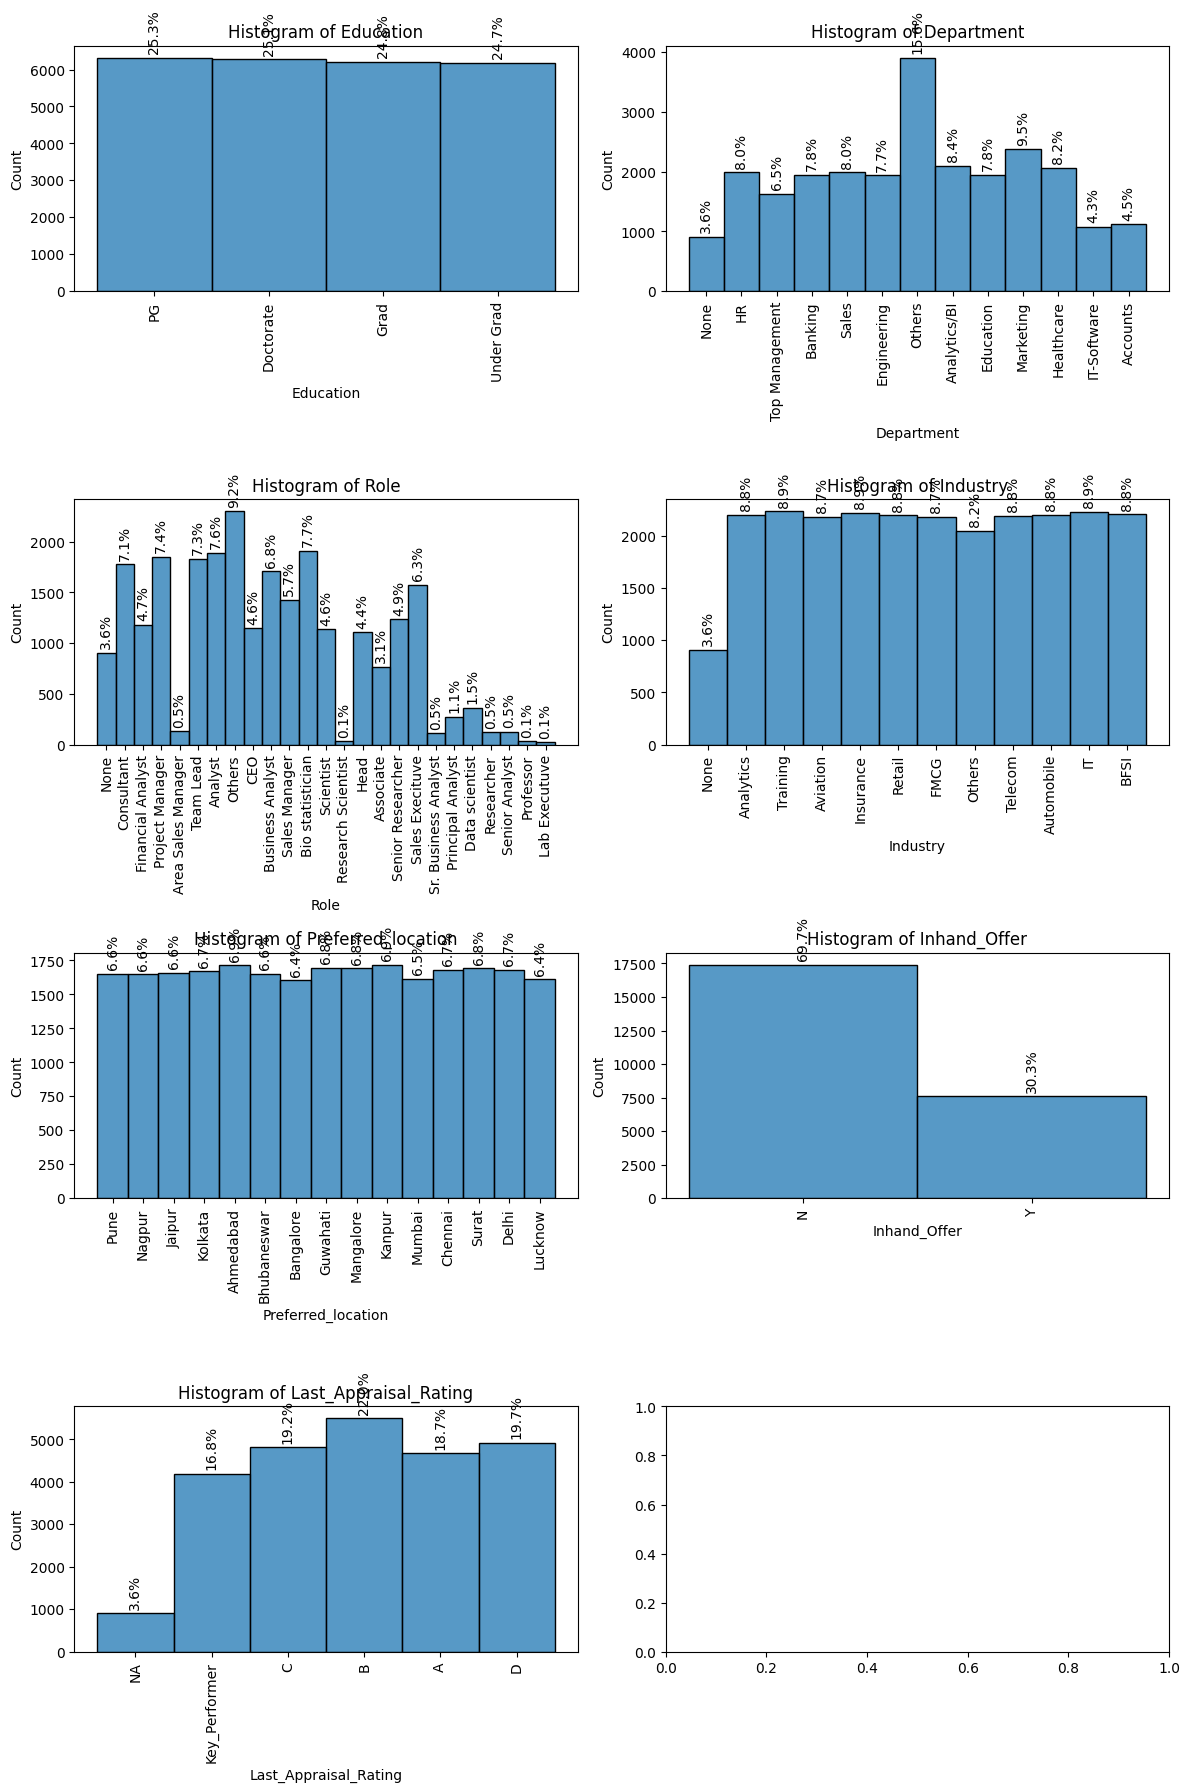

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))

# List of columns for which histograms are plotted
columns = ['Education', 'Department', 'Role', 'Industry', 'Preferred_location', 'Inhand_Offer', 'Last_Appraisal_Rating']

# Function to annotate bars with percentage
def annotate_with_percentage(data, total, ax):
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate(f'{height / total:.1%}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom',rotation=90)

# Plot histograms and add annotations
for column, ax in zip(columns, axes.flatten()):
    sns.histplot(hr_data, x=column, ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    total_count = len(hr_data[column])
    annotate_with_percentage(hr_data[column].value_counts(), total_count, ax)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

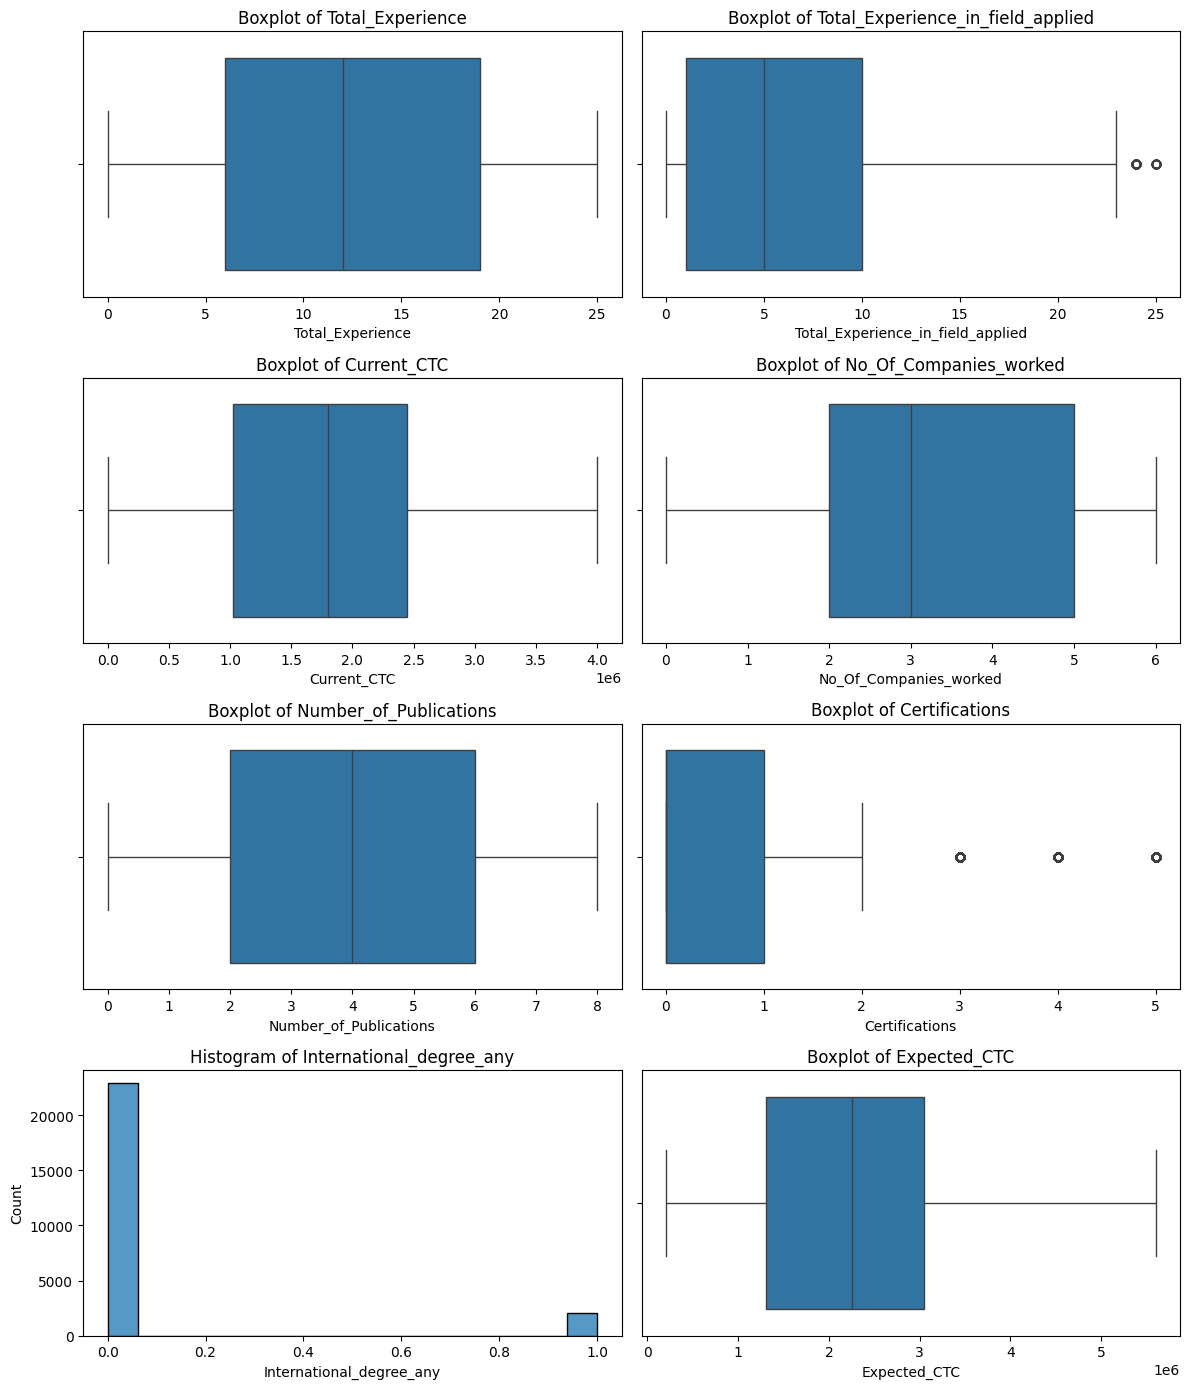

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
sns.boxplot(hr_data, x='Total_Experience', ax=axes[0][0])
axes[0][0].set_title('Boxplot of Total_Experience')

sns.boxplot(hr_data, x='Total_Experience_in_field_applied', ax=axes[0][1])
axes[0][1].set_title('Boxplot of Total_Experience_in_field_applied')


sns.boxplot(hr_data, x='Current_CTC', ax=axes[1][0])
axes[1][0].set_title('Boxplot of Current_CTC')


sns.boxplot(hr_data, x='No_Of_Companies_worked', ax=axes[1][1])
axes[1][1].set_title('Boxplot of No_Of_Companies_worked')


sns.boxplot(hr_data, x='Number_of_Publications', ax=axes[2][0])
axes[2][0].set_title('Boxplot of Number_of_Publications')


sns.boxplot(hr_data, x='Certifications', ax=axes[2][1])
axes[2][1].set_title('Boxplot of Certifications')


sns.histplot(hr_data, x='International_degree_any', ax=axes[3][0])
axes[3][0].set_title('Histogram of International_degree_any')


sns.boxplot(hr_data, x='Expected_CTC', ax=axes[3][1])
axes[3][1].set_title('Boxplot of Expected_CTC')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Bivariate Analysis

<ipython-input-63-6a57a11eb617>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=90)
<ipython-input-63-6a57a11eb617>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=90)
<ipython-input-63-6a57a11eb617>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=90)
<ipython-input-63-6a57a11eb617>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_xticklabels(axes[2][0].get_xticklabels(), rotation=90)


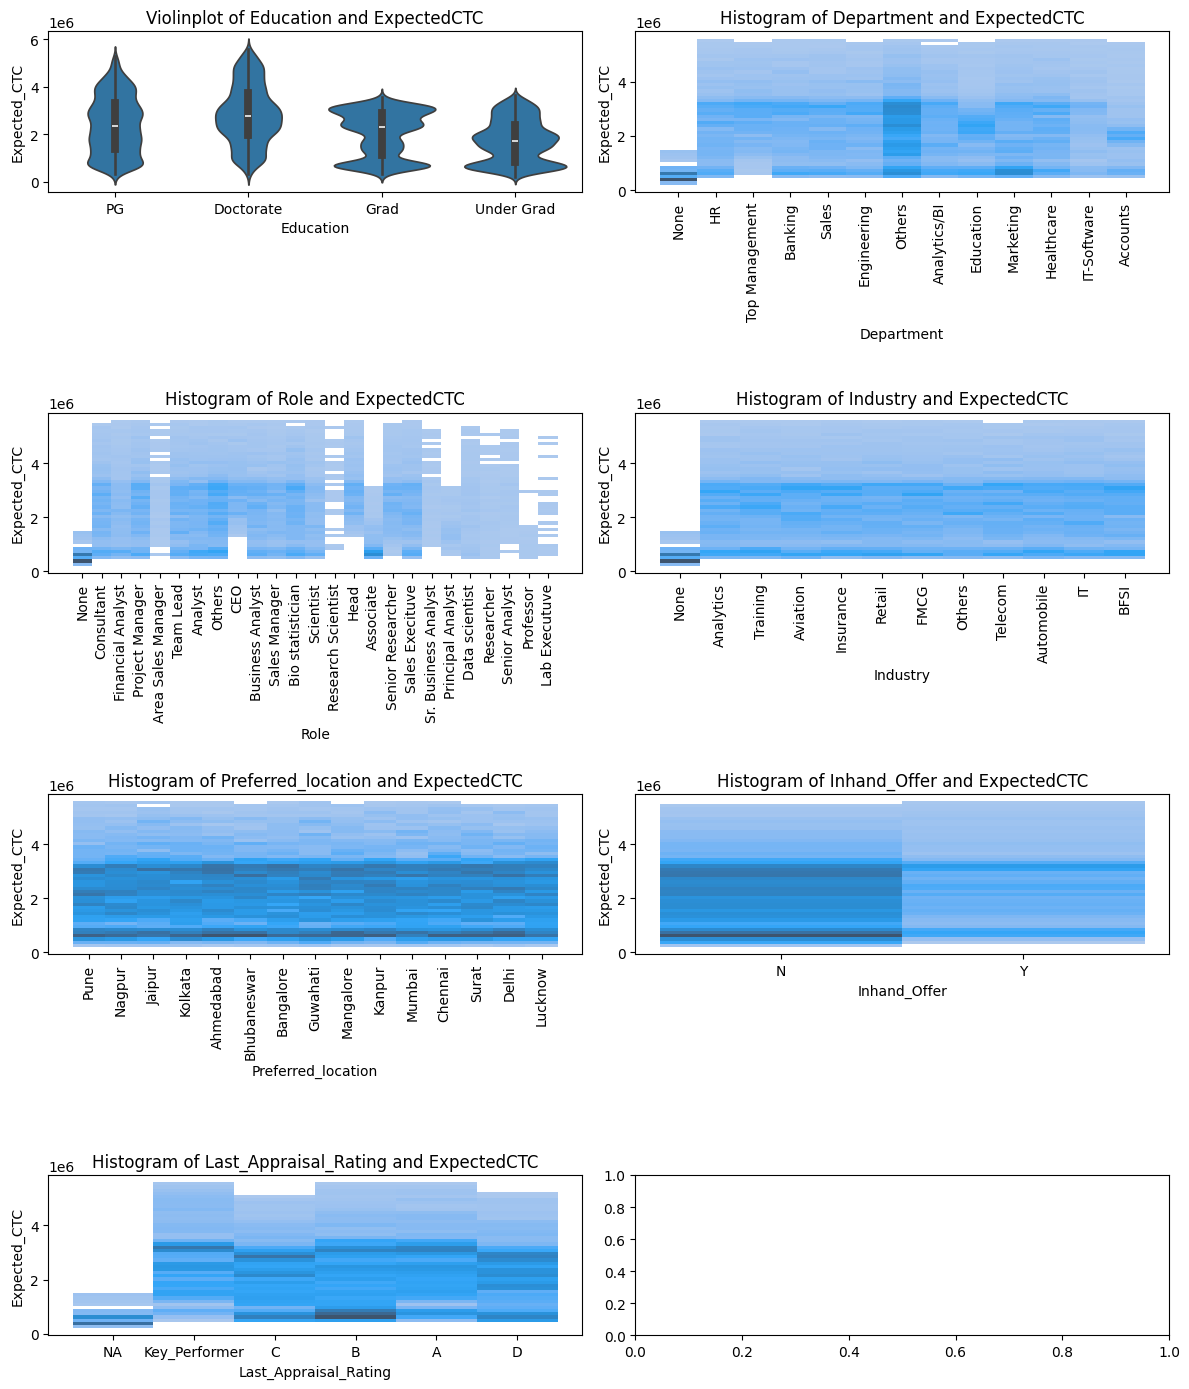

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
sns.violinplot(hr_data, x='Education',y='Expected_CTC', ax=axes[0][0])
axes[0][0].set_title('Violinplot of Education and ExpectedCTC')

sns.histplot(hr_data, x='Department',y='Expected_CTC', ax=axes[0][1])
axes[0][1].set_title('Histogram of Department and ExpectedCTC')
axes[0][1].set_xticklabels(axes[0][1].get_xticklabels(), rotation=90)

sns.histplot(hr_data, x='Role', y='Expected_CTC',ax=axes[1][0])
axes[1][0].set_title('Histogram of Role and ExpectedCTC')
axes[1][0].set_xticklabels(axes[1][0].get_xticklabels(), rotation=90)

sns.histplot(hr_data, x='Industry', y='Expected_CTC', ax=axes[1][1])
axes[1][1].set_title('Histogram of Industry and ExpectedCTC')
axes[1][1].set_xticklabels(axes[1][1].get_xticklabels(), rotation=90)

sns.histplot(hr_data, x='Preferred_location',y='Expected_CTC', ax=axes[2][0])
axes[2][0].set_title('Histogram of Preferred_location and ExpectedCTC')
axes[2][0].set_xticklabels(axes[2][0].get_xticklabels(), rotation=90)

sns.histplot(hr_data, x='Inhand_Offer',y='Expected_CTC', ax=axes[2][1])
axes[2][1].set_title('Histogram of Inhand_Offer and ExpectedCTC')


sns.histplot(hr_data, x='Last_Appraisal_Rating', y='Expected_CTC',ax=axes[3][0])
axes[3][0].set_title('Histogram of Last_Appraisal_Rating and ExpectedCTC')


plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

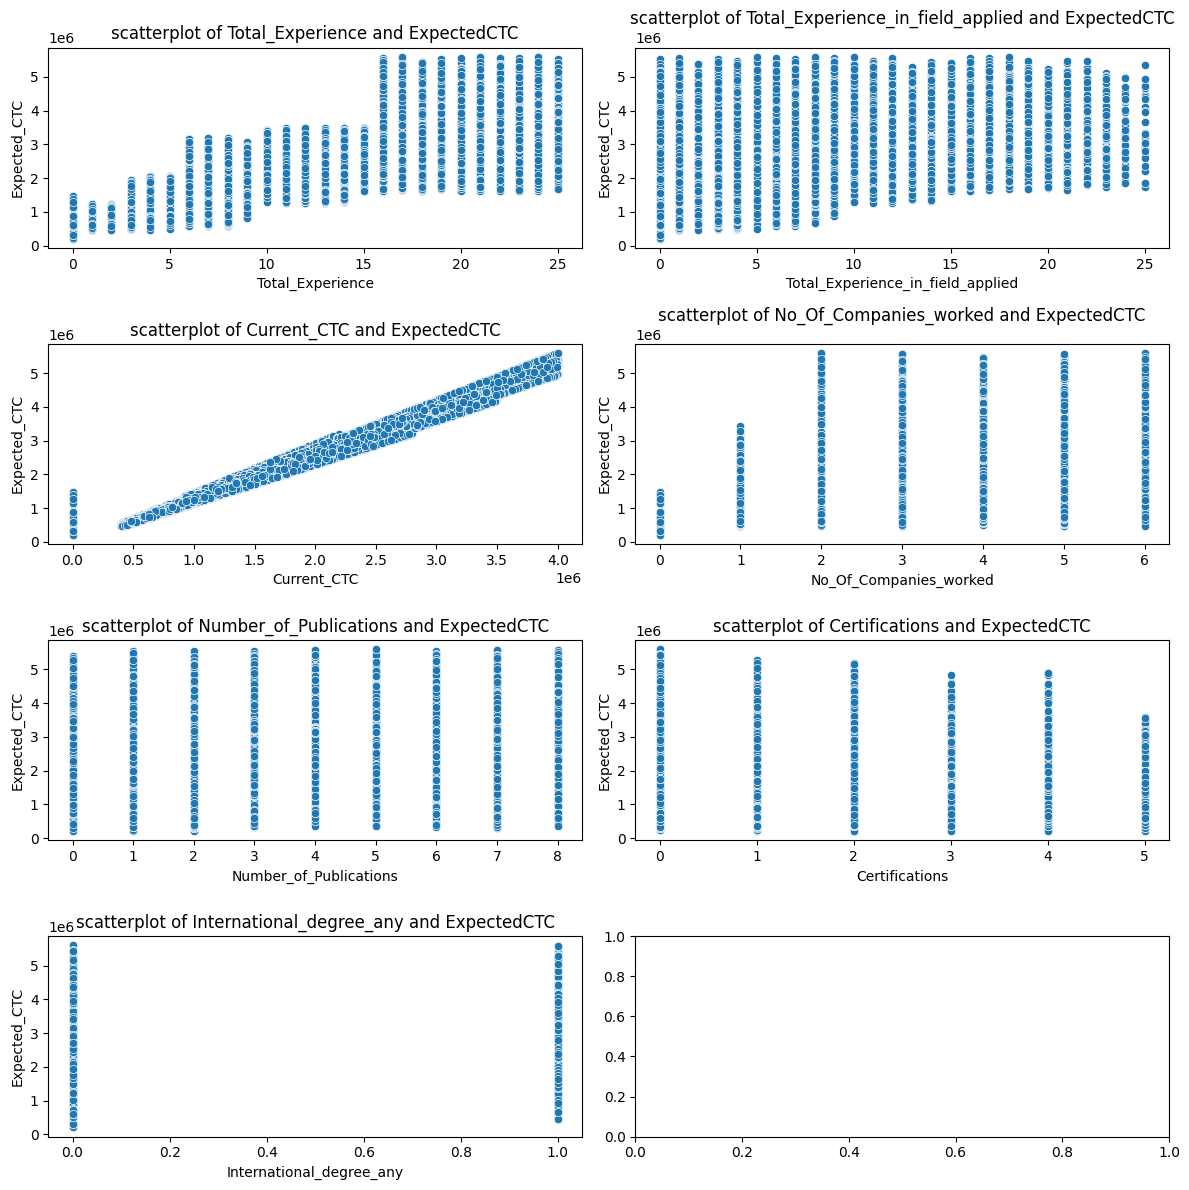

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 12));
sns.scatterplot(hr_data, x='Total_Experience', y='Expected_CTC', ax=axes[0][0]);
axes[0][0].set_title('scatterplot of Total_Experience and ExpectedCTC');

sns.scatterplot(hr_data, x='Total_Experience_in_field_applied', y='Expected_CTC', ax=axes[0][1]);
axes[0][1].set_title('scatterplot of Total_Experience_in_field_applied and ExpectedCTC');


sns.scatterplot(hr_data, x='Current_CTC', y='Expected_CTC', ax=axes[1][0]);
axes[1][0].set_title('scatterplot of Current_CTC and ExpectedCTC');


sns.scatterplot(hr_data, x='No_Of_Companies_worked', y='Expected_CTC', ax=axes[1][1]);
axes[1][1].set_title('scatterplot of No_Of_Companies_worked and ExpectedCTC');


sns.scatterplot(hr_data, x='Number_of_Publications', y='Expected_CTC', ax=axes[2][0]);
axes[2][0].set_title('scatterplot of Number_of_Publications and ExpectedCTC');


sns.scatterplot(hr_data, x='Certifications', y='Expected_CTC', ax=axes[2][1]);
axes[2][1].set_title('scatterplot of Certifications and ExpectedCTC');


sns.scatterplot(hr_data, x='International_degree_any', y='Expected_CTC', ax=axes[3][0]);
axes[3][0].set_title('scatterplot of International_degree_any and ExpectedCTC');

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
hr_data.drop(['Preferred_location'],axis=1,inplace=True)


In [ ]:
hr_data

,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Education,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,0,0,None,None,None,PG,0,N,NA,0,0,0,0,384551
1,23,14,HR,Consultant,Analytics,Doctorate,2702664,Y,Key_Performer,2,4,0,0,3783729
2,21,12,Top Management,Consultant,Training,Doctorate,2236661,Y,Key_Performer,5,3,0,0,3131325
3,15,8,Banking,Financial Analyst,Aviation,Doctorate,2100510,N,C,5,3,0,0,2608833
4,10,5,Sales,Project Manager,Insurance,Grad,1931644,N,C,2,3,0,0,2221390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,Engineering,Project Manager,Automobile,PG,3410899,N,B,3,6,0,0,4434168
24996,12,8,HR,Others,Analytics,Under Grad,1350793,Y,B,6,7,0,0,1756030
24997,22,8,Banking,Head,Insurance,Under Grad,1681796,N,C,4,5,2,0,1934065
24998,25,8,Marketing,CEO,BFSI,PG,3311090,Y,B,3,1,1,0,4370638


In [ ]:
numeric_data = hr_data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                                   Total_Experience  \
Total_Experience                           1.000000   
Total_Experience_in_field_applied          0.645135   
Current_CTC                                0.846476   
No_Of_Companies_worked                     0.398135   
Number_of_Publications                    -0.000494   
Certifications                            -0.001130   
International_degree_any                   0.084072   
Expected_CTC                               0.816593   

                                   Total_Experience_in_field_applied  \
Total_Experience                                            0.645135   
Total_Experience_in_field_applied                           1.000000   
Current_CTC                                                 0.548017   
No_Of_Companies_worked                                      0.249045   
Number_of_Publications                                     -0.010663   
Certifications                                             -0.002814   


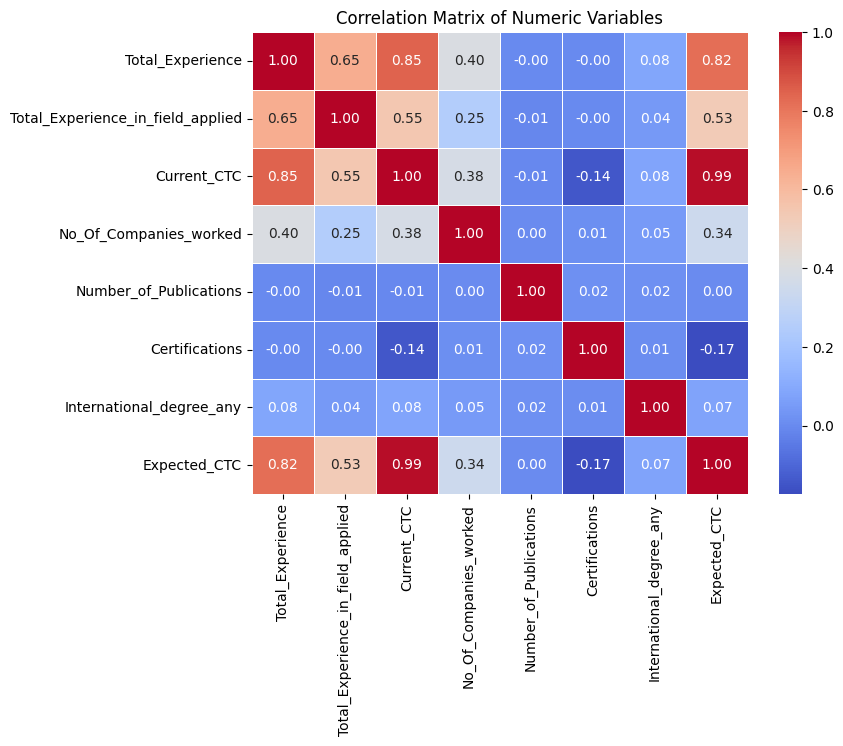

In [ ]:
# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

<Figure size 800x600 with 0 Axes>

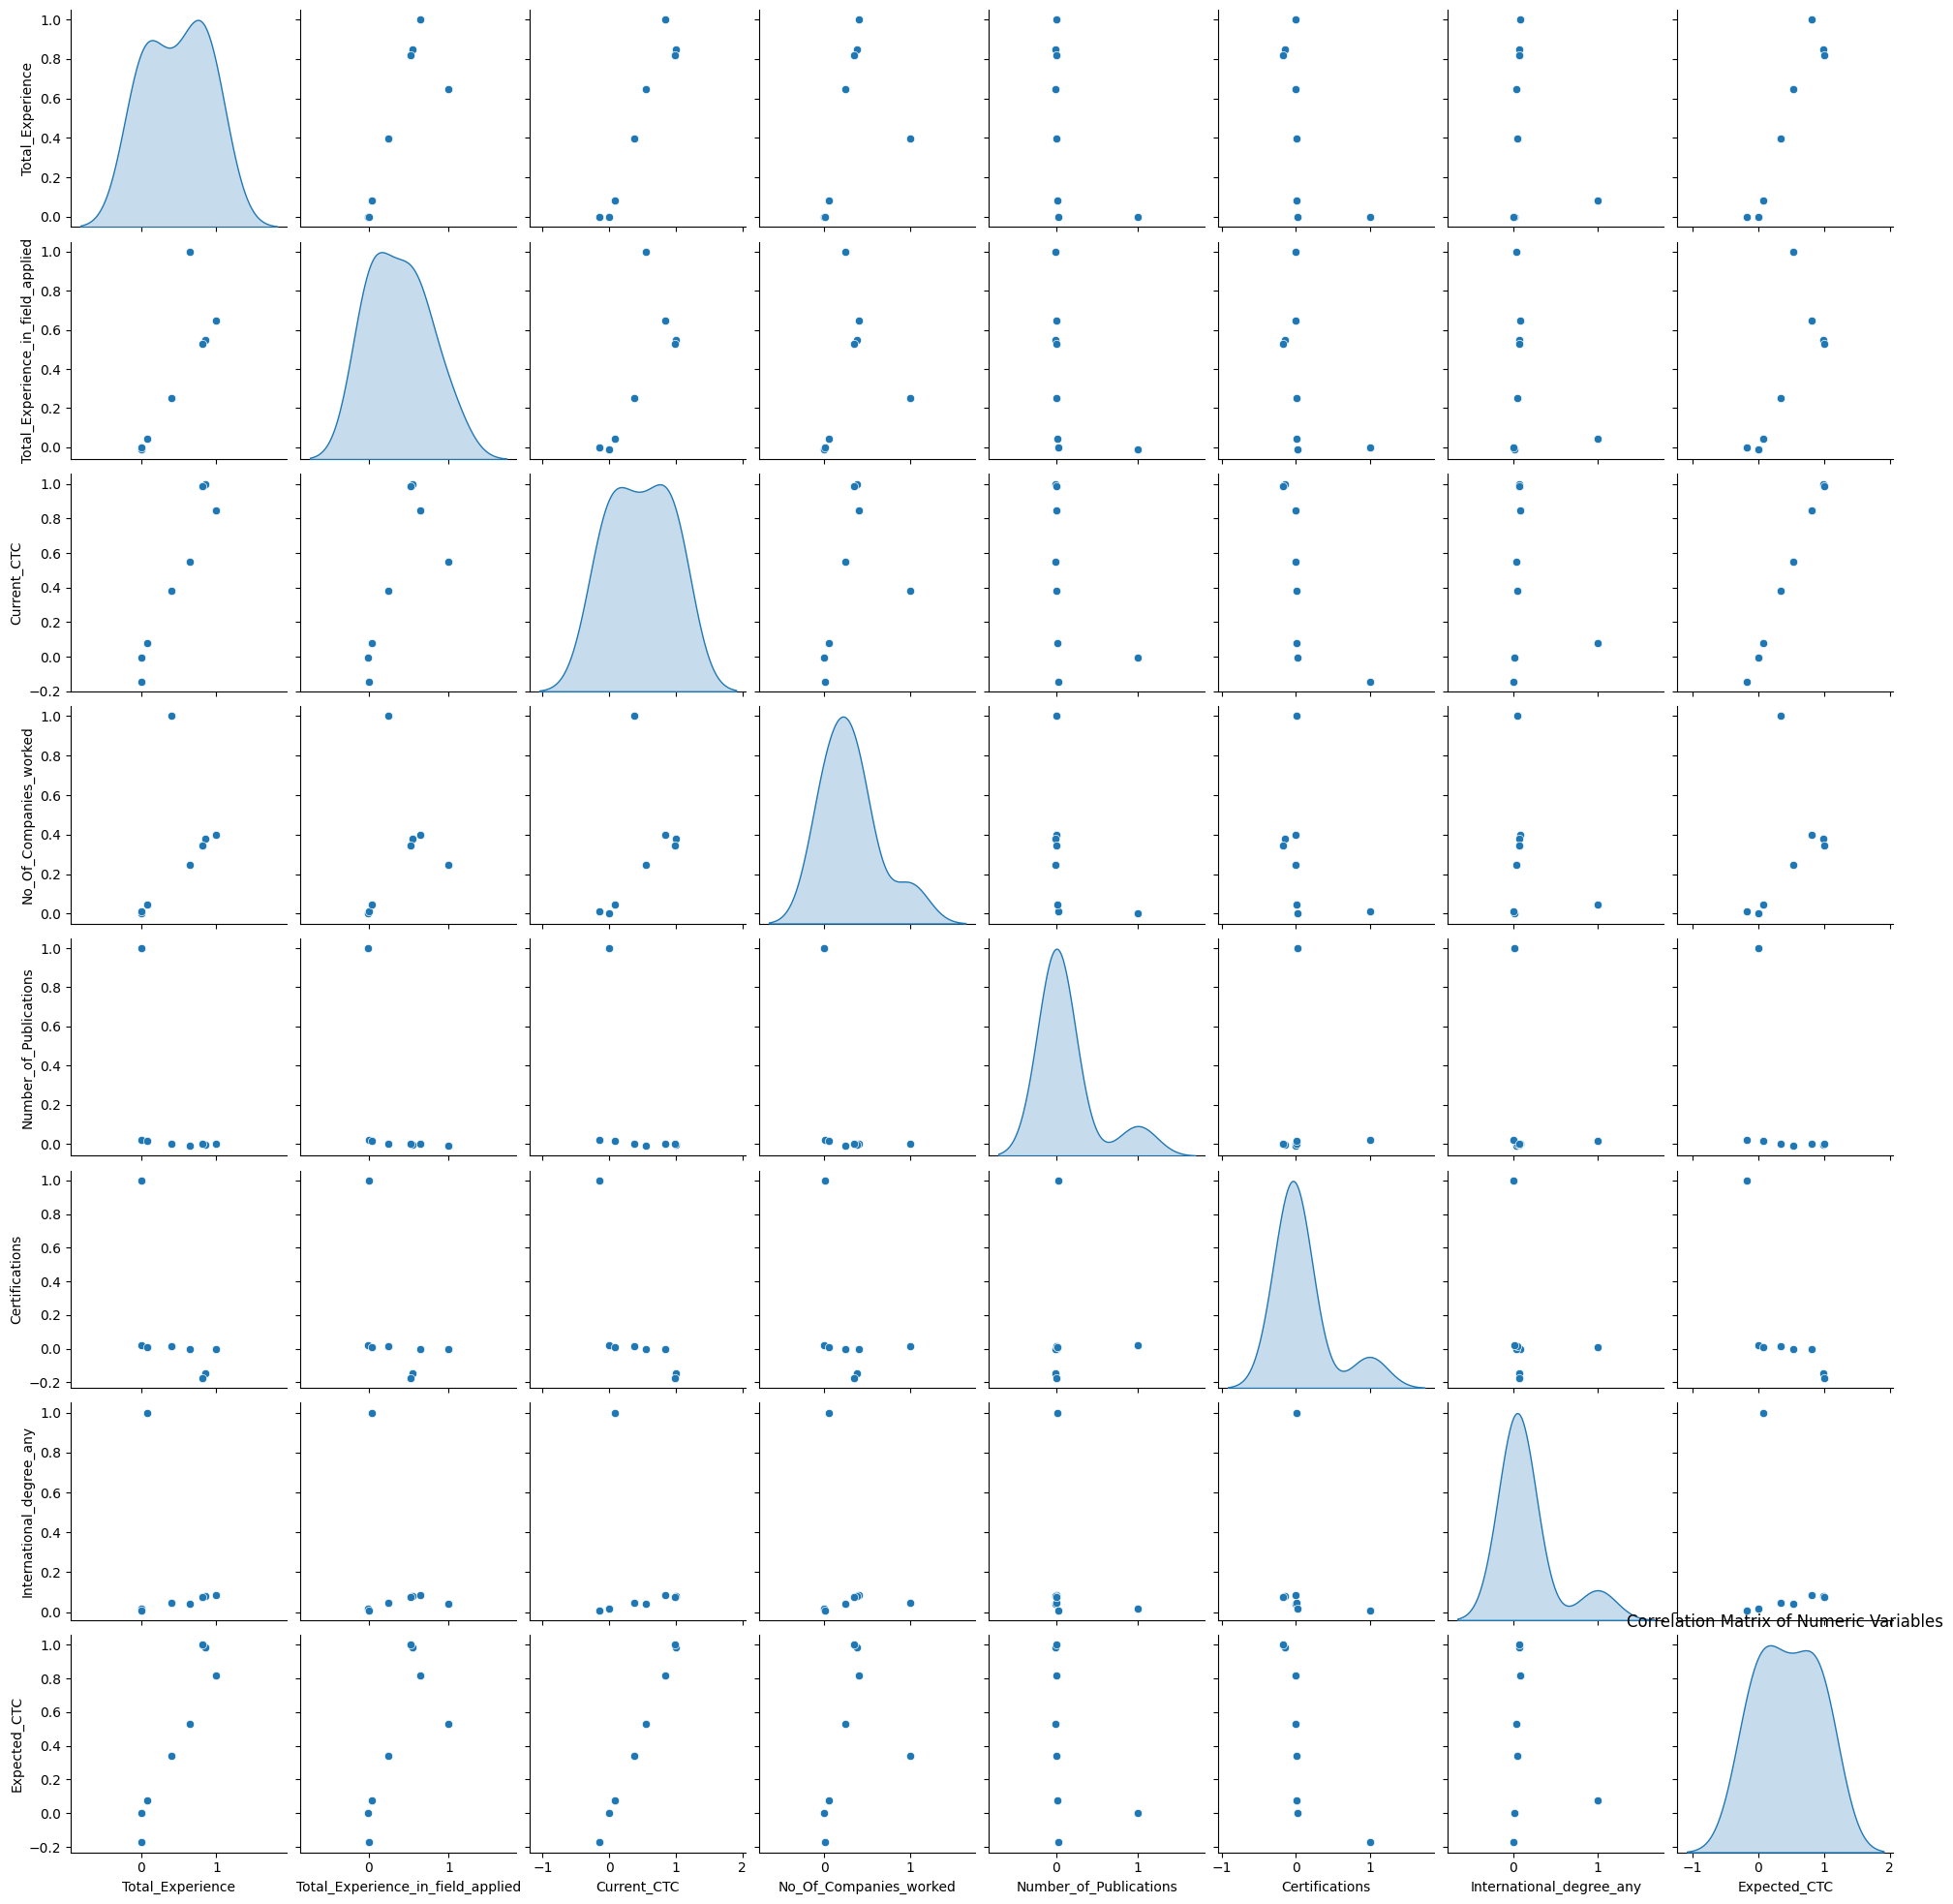

In [ ]:
# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.pairplot(correlation_matrix, diag_kind="kde" )
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

### Encoding

In [ ]:
hr_data = pd.get_dummies(hr_data, columns=["Department"], drop_first=True)

In [ ]:
hr_data = pd.get_dummies(hr_data, columns=["Role"], drop_first=True)
hr_data = pd.get_dummies(hr_data, columns=["Industry"], drop_first=True)
hr_data = pd.get_dummies(hr_data, columns=["Education"], drop_first=True)



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
hr_data['Inhand_Offer'] = label_encoder.fit_transform(hr_data['Inhand_Offer'])

In [ ]:
hr_data = pd.get_dummies(hr_data, columns=["Last_Appraisal_Rating"], drop_first=True)

In [ ]:
hr_data.columns

Index(['Total_Experience', 'Total_Experience_in_field_applied', 'Current_CTC',
       'Inhand_Offer', 'No_Of_Companies_worked', 'Number_of_Publications',
       'Certifications', 'International_degree_any', 'Expected_CTC',
       'Department_Analytics/BI', 'Department_Banking', 'Department_Education',
       'Department_Engineering', 'Department_HR', 'Department_Healthcare',
       'Department_IT-Software', 'Department_Marketing', 'Department_None',
       'Department_Others', 'Department_Sales', 'Department_Top Management',
       'Role_Area Sales Manager', 'Role_Associate', 'Role_Bio statistician',
       'Role_Business Analyst', 'Role_CEO', 'Role_Consultant',
       'Role_Data scientist', 'Role_Financial Analyst', 'Role_Head',
       'Role_Lab Executuve', 'Role_None', 'Role_Others',
       'Role_Principal Analyst', 'Role_Professor', 'Role_Project Manager',
       'Role_Research Scientist', 'Role_Researcher', 'Role_Sales Execituve',
       'Role_Sales Manager', 'Role_Scientist', 'Rol

In [ ]:
X=hr_data.drop(['Expected_CTC'],axis=1)
X

,Total_Experience,Total_Experience_in_field_applied,Current_CTC,Inhand_Offer,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Department_Analytics/BI,Department_Banking,...,Industry_Telecom,Industry_Training,Education_Grad,Education_PG,Education_Under Grad,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Last_Appraisal_Rating_NA
0,0,0,0,0,0,0,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,23,14,2702664,1,2,4,0,0,False,False,...,False,False,False,False,False,False,False,False,True,False
2,21,12,2236661,1,5,3,0,0,False,False,...,False,True,False,False,False,False,False,False,True,False
3,15,8,2100510,0,5,3,0,0,False,True,...,False,False,False,False,False,False,True,False,False,False
4,10,5,1931644,0,2,3,0,0,False,False,...,False,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,13,3410899,0,3,6,0,0,False,False,...,False,False,False,True,False,True,False,False,False,False
24996,12,8,1350793,1,6,7,0,0,False,False,...,False,False,False,False,True,True,False,False,False,False
24997,22,8,1681796,0,4,5,2,0,False,True,...,False,False,False,False,True,False,True,False,False,False
24998,25,8,3311090,1,3,1,1,0,False,False,...,False,False,False,True,False,True,False,False,False,False


In [ ]:
y=hr_data[["Expected_CTC"]]
y

,Expected_CTC
0,384551
1,3783729
2,3131325
3,2608833
4,2221390
...,...
24995,4434168
24996,1756030
24997,1934065
24998,4370638


In [ ]:
# Split the data into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train= X_train.astype(int)
X_test= X_test.astype(int)

In [ ]:
from IPython.display import display
display(X_train.head())
print(X_train.shape)

,Total_Experience,Total_Experience_in_field_applied,Current_CTC,Inhand_Offer,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Department_Analytics/BI,Department_Banking,Department_Education,Department_Engineering,Department_HR,Department_Healthcare,Department_IT-Software,Department_Marketing,Department_None,Department_Others,Department_Sales,Department_Top Management,Role_Area Sales Manager,Role_Associate,Role_Bio statistician,Role_Business Analyst,Role_CEO,Role_Consultant,Role_Data scientist,Role_Financial Analyst,Role_Head,Role_Lab Executuve,Role_None,Role_Others,Role_Principal Analyst,Role_Professor,Role_Project Manager,Role_Research Scientist,Role_Researcher,Role_Sales Execituve,Role_Sales Manager,Role_Scientist,Role_Senior Analyst,Role_Senior Researcher,Role_Sr. Business Analyst,Role_Team Lead,Industry_Automobile,Industry_Aviation,Industry_BFSI,Industry_FMCG,Industry_IT,Industry_Insurance,Industry_None,Industry_Others,Industry_Retail,Industry_Telecom,Industry_Training,Education_Grad,Education_PG,Education_Under Grad,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Last_Appraisal_Rating_NA
4913,20,2,2412005,1,5,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
9338,14,9,2151186,0,6,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
24211,12,12,1440384,0,2,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
18791,21,9,2529805,0,5,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
16066,15,2,1985793,1,2,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


(17500, 63)


In [ ]:
display(X_test.head())
print(X_test.shape)

,Total_Experience,Total_Experience_in_field_applied,Current_CTC,Inhand_Offer,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Department_Analytics/BI,Department_Banking,Department_Education,Department_Engineering,Department_HR,Department_Healthcare,Department_IT-Software,Department_Marketing,Department_None,Department_Others,Department_Sales,Department_Top Management,Role_Area Sales Manager,Role_Associate,Role_Bio statistician,Role_Business Analyst,Role_CEO,Role_Consultant,Role_Data scientist,Role_Financial Analyst,Role_Head,Role_Lab Executuve,Role_None,Role_Others,Role_Principal Analyst,Role_Professor,Role_Project Manager,Role_Research Scientist,Role_Researcher,Role_Sales Execituve,Role_Sales Manager,Role_Scientist,Role_Senior Analyst,Role_Senior Researcher,Role_Sr. Business Analyst,Role_Team Lead,Industry_Automobile,Industry_Aviation,Industry_BFSI,Industry_FMCG,Industry_IT,Industry_Insurance,Industry_None,Industry_Others,Industry_Retail,Industry_Telecom,Industry_Training,Education_Grad,Education_PG,Education_Under Grad,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer,Last_Appraisal_Rating_NA
6868,19,8,2394672,1,3,5,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
24016,9,4,1056095,0,4,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
9668,18,6,2598598,1,4,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
13640,19,18,2399983,0,5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
14018,6,0,904612,0,4,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


(7500, 63)


Linear Regression

In [ ]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#prediction on training data
training_data_prediction_LR=lin_reg_model.predict(X_train)
#R_Squared Error
score1LR=metrics.r2_score(y_train,training_data_prediction_LR)
print("R-Squared error of Train data:",score1LR)
# Mean Absolute Error
score2LR=metrics.mean_absolute_error(y_train,training_data_prediction_LR)
print("Mean Absolute errorof train data:",score2LR)
mean_absolute_percentage_error_LR=mean_absolute_percentage_error(y_train,training_data_prediction_LR)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_LR)

R-Squared error of Train data: 0.9957980774770931
Mean Absolute errorof train data: 50733.07138050427
mean_absolute_percentage_error: 0.04214557976546945


In [ ]:
test_data_prediction_LR=lin_reg_model.predict(X_test)
# R-squared error
score1LR_test=metrics.r2_score(y_test,test_data_prediction_LR)
print("R-Squared error of test data:",score1LR_test)
# Mean Absolute Error
score2LR_test=metrics.mean_absolute_error(y_test,test_data_prediction_LR)
print("Mean Absolute error of test data:",score2LR_test)
cv_scores=cross_val_score(lin_reg_model,X_train,y_train,scoring='r2')
print("cv scores:",cv_scores)
mean_cv_score = cv_scores.mean()
print("cv scores mean:",mean_cv_score)
mean_absolute_percentage_error_LRT=mean_absolute_percentage_error(y_test,test_data_prediction_LR)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_LRT)

R-Squared error of test data: 0.9958637018017951
Mean Absolute error of test data: 50441.395242504645
cv scores: [0.99556797 0.99595388 0.99585452 0.99578703 0.99569849]
cv scores mean: 0.9957723804440228
mean_absolute_percentage_error: 0.04129243187102793


**Lasso** **Regression**

In [ ]:
lass_reg_model=Lasso()
lass_reg_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.320e+12, tolerance: 2.363e+12
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
#prediction on training data
training_data_prediction_Lass=lass_reg_model.predict(X_train)
#R_Squared Error
score1Lass=metrics.r2_score(y_train,training_data_prediction_Lass)
print("R-Squared error of training data:",score1Lass)
# Mean Absolute Error
score2Lass=metrics.mean_absolute_error(y_train,training_data_prediction_Lass)
print("Mean Absolute error training data:",score2Lass)
mean_absolute_percentage_error_LA=mean_absolute_percentage_error(y_train,training_data_prediction_Lass)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_LA)

R-Squared error of training data: 0.9957980706052376
Mean Absolute error training data: 50731.598573410556
mean_absolute_percentage_error: 0.04214430248322336


In [ ]:
#prediction on test data
test_data_prediction_Lass=lass_reg_model.predict(X_test)
# R-squared error
score1Lass_test=metrics.r2_score(y_test,test_data_prediction_Lass)
print("R-Squared error of test data:",score1Lass_test)
# Mean Absolute Error
score2Lass_test=metrics.mean_absolute_error(y_test,test_data_prediction_Lass)
print("Mean Absolute error of test data:",score2Lass_test)
mean_absolute_percentage_error_LAT=mean_absolute_percentage_error(y_test,test_data_prediction_Lass)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_LAT)

R-Squared error of test data: 0.9958639044308392
Mean Absolute error of test data: 50438.928061412764
mean_absolute_percentage_error: 0.04129011468055769


In [ ]:
cv_scores=cross_val_score(lass_reg_model,X_train,y_train,scoring='r2')
print("cv scores:",cv_scores)
mean_cv_score = cv_scores.mean()
print("cv scores mean:",mean_cv_score)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.651e+12, tolerance: 1.891e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.646e+12, tolerance: 1.884e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.620e+12, tolerance: 1.892e

cv scores: [0.99556802 0.99595407 0.99585475 0.99578729 0.99569888]
cv scores mean: 0.9957726018469126


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.680e+12, tolerance: 1.892e+12
  model = cd_fast.enet_coordinate_descent(


**DecisionTreeRegression**

In [ ]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
train_data_prediction_DT=dt.predict(X_train)
#R_Squared Error
score1DT=metrics.r2_score(y_train,train_data_prediction_DT)
print("R-Squared error of train data:",score1DT)
# Mean Absolute Error
score2DT=metrics.mean_absolute_error(y_train,train_data_prediction_DT)
print("Mean Absolute error of train data:",score2DT)
mean_absolute_percentage_error_DT=mean_absolute_percentage_error(y_train,train_data_prediction_DT)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_DT)

R-Squared error of train data: 0.9994407344274412
Mean Absolute error of train data: 3304.81304042175
mean_absolute_percentage_error: 0.005395778248202849


In [ ]:
test_data_prediction_DT=dt.predict(X_test)
#R_Squared Error
score1DT=metrics.r2_score(y_test,test_data_prediction_DT)
print("R-Squared error of test data:",score1DT)
# Mean Absolute Error
score2DT=metrics.mean_absolute_error(y_test,test_data_prediction_DT)
print("Mean Absolute error of test data:",score2DT)
mean_absolute_percentage_error_DTT=mean_absolute_percentage_error(y_test,test_data_prediction_DT)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_DTT)

R-Squared error of test data: 0.9990932837187487
Mean Absolute error of test data: 13834.794107413225
mean_absolute_percentage_error: 0.012176100156785037


In [ ]:
cv_scores=cross_val_score(dt,X_test,y_test,scoring='r2')
print("cv scores:",cv_scores)
mean_cv_score = cv_scores.mean()
print("cv scores mean:",mean_cv_score)

cv scores: [0.99755538 0.99783448 0.99774344 0.99783524 0.99676568]
cv scores mean: 0.9975468449628174


**Gradiant Boost Ensemble Model**

In [ ]:
reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [ ]:
train_data_prediction_GB=reg.predict(X_train)
#R_Squared Error
score1GB=metrics.r2_score(y_train,train_data_prediction_GB)
print("R-Squared error of train data:",score1GB)
# Mean Absolute Error
score2GB=metrics.mean_absolute_error(y_train,train_data_prediction_GB)
print("Mean Absolute error of train data:",score2GB)
mean_absolute_percentage_error_GB=mean_absolute_percentage_error(y_train,train_data_prediction_GB)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_GB)

R-Squared error of train data: 0.9982414885888725
Mean Absolute error of train data: 27880.18469890602
mean_absolute_percentage_error: 0.0214408414013977


In [ ]:
test_data_prediction_GB=reg.predict(X_test)
#R_Squared Error
score1GB=metrics.r2_score(y_test,test_data_prediction_GB)
print("R-Squared error of test data:",score1GB)
# Mean Absolute Error
score2GB=metrics.mean_absolute_error(y_test,test_data_prediction_GB)
print("Mean Absolute error of test data:",score2GB)
mean_absolute_percentage_error_GBT=mean_absolute_percentage_error(y_test,test_data_prediction_GB)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_GBT)

R-Squared error of test data: 0.9982788393249754
Mean Absolute error of test data: 27929.38734386257
mean_absolute_percentage_error: 0.02059713908607972


In [ ]:
cv_scores=cross_val_score(reg,X_test,y_test,scoring='r2')
print("cv scores:",cv_scores)
mean_cv_score = cv_scores.mean()
print("cv scores mean:",mean_cv_score)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

cv scores: [0.99777666 0.99824144 0.99810437 0.99836425 0.99761031]
cv scores mean: 0.9980194069321501


**XG Boost Regressor**

In [ ]:
model=XGBRegressor()
model.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction_XG=model.predict(X_train)
#R_Squared Error
score1=metrics.r2_score(y_train,training_data_prediction_XG)
print("R-Squared error of train data:",score1)
# Mean Absolute Error
score2=metrics.mean_absolute_error(y_train,training_data_prediction_XG)
print("Mean Absolute error of train data:",score2)
mean_absolute_percentage_error_XG=mean_absolute_percentage_error(y_train,training_data_prediction_XG)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_XG)

R-Squared error of train data: 0.9993462986342102
Mean Absolute error of train data: 11177.8447875
mean_absolute_percentage_error: 0.010094545177000366


In [ ]:
test_data_prediction_XG=model.predict(X_test)
#R_Squared Error
score1=metrics.r2_score(y_test,test_data_prediction_XG)
print("R-Squared error of test data:",score1)
# Mean Absolute Error
score2=metrics.mean_absolute_error(y_test,test_data_prediction_XG)
print("Mean Absolute error of test data:",score2)
mean_absolute_percentage_error_XGT=mean_absolute_percentage_error(y_test,test_data_prediction_XG)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_XGT)

R-Squared error of test data: 0.9992890637646527
Mean Absolute error of test data: 13362.343158333333
mean_absolute_percentage_error: 0.011261950861270626


In [ ]:
cv_scores=cross_val_score(model,X_test,y_test,scoring='r2')
print("cv scores:",cv_scores)
mean_cv_score = cv_scores.mean()
print("cv scores mean:",mean_cv_score)

cv scores: [0.99901827 0.99912429 0.99903176 0.9992207  0.99841264]
cv scores mean: 0.9989615321201804


**Random Forest Regressor**

In [ ]:
regressor=RandomForestRegressor(n_estimators=50,random_state=42)
regressor.fit(X_train,y_train)

<ipython-input-110-2c131de29669>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(n_estimators=50, random_state=42)

In [ ]:
train_data_prediction_RF=regressor.predict(X_train)
#R_Squared Error
score1RF=metrics.r2_score(y_train,train_data_prediction_RF)
print("R-Squared error of train data:",score1RF)
# Mean Absolute Error
score2RF=metrics.mean_absolute_error(y_train,train_data_prediction_RF)
print("Mean Absolute error train data:",score2RF)
mean_absolute_percentage_error_RF=mean_absolute_percentage_error(y_train,train_data_prediction_RF)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_RF)

R-Squared error of train data: 0.9994095480702595
Mean Absolute error train data: 6866.652504572341
mean_absolute_percentage_error: 0.007639099047974069


In [ ]:
test_data_prediction_RF=regressor.predict(X_test)
#R_Squared Error
score1RF=metrics.r2_score(y_test,test_data_prediction_RF)
print("R-Squared error of test data:",score1RF)
# Mean Absolute Error
score2RF=metrics.mean_absolute_error(y_test,test_data_prediction_RF)
print("Mean Absolute error of test data:",score2RF)
mean_absolute_percentage_error_RFT=mean_absolute_percentage_error(y_test,test_data_prediction_RF)
print("mean_absolute_percentage_error:",mean_absolute_percentage_error_RFT)

R-Squared error of test data: 0.9992293727392857
Mean Absolute error of test data: 12525.19102523659
mean_absolute_percentage_error: 0.011277779574345243


In [ ]:
cv_scores=cross_val_score(regressor,X_test,y_test,scoring='r2')
print("cv scores:",cv_scores)
mean_cv_score = cv_scores.mean()
print("cv scores mean:",mean_cv_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

cv scores: [0.99822052 0.99838762 0.99852819 0.99859133 0.99771438]
cv scores mean: 0.998288407811259
